In [50]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [42]:
M = 10  # Control horizon
P = 20  # Prediction horizon
DeltaT = output_interval  # Sampling rate

tcontinuous = numpy.linspace(0, P*DeltaT, int(5*(M-0)/DeltaT))  # some closely spaced time points
tpredict = numpy.arange(0, (P+1)*DeltaT, DeltaT)   # discrete points at prediction horizon

In [37]:
tau_c = 1
r = 1 - numpy.exp(-tpredict/tau_c)

In [39]:
u = numpy.ones(M)

In [46]:
len(tpredict)

21

In [ ]:
def prediction(filename, stop_time=P, output_intervaoutput_interval, start_values=parameters, output=outputs, inputs=inputs):
    """Predict the effect of an input signal"""
    t, y, x = scipy.signal.lsim(G, u, t, X0=x0, interp=False)
    results = simulate_fmu(filename,
                           start_time=0,
                           stop_time=stop_time,
                           output_interval=output_interval,
                           start_values=parameters,
                           output=outputs,
                           input=inputs)
    return results

In [ ]:
def objective(u, x0=x0):
    """Calculate the sum of the square error for the cotnrol problem"""
    y = prediction(extend(u))
    results = simulate_fmu(filename,
                           start_time=0,
                           stop_time=stop_time,
                           output_interval=output_interval,
                           start_values=parameters,
                           output=outputs,
                           input=inputs)
    return sum((r - y)**2)

In [ ]:
scipy.optimize.minimize(objective, u)

In [ ]:
def extend(u):
    """We optimise the first M values of u but we need P values for prediction"""
    u, numpy.repeat(u[-1], P-M)])
    
    results = simulate_fmu(filename,
                   start_time=0,stop_time=stop_time,output_interval=output_interval,
                   start_values=parameters,output=outputs,input=u)
    return results

In [ ]:
x0 = np.ones(nV)

In [ ]:
scipy.optimize.least_squares(fun=objective,x0=start_values,args = args)

In [133]:
def createInputs(inputList,dtype):
    # verify length of arrays in inputList are equal
    refLength = len(inputList[0])
    for i in range(len(inputList)-1):
        if len(inputList[i+1]) != refLength:
            raise ValueError('Input arrays of inputList must be equal.')
            
    # Create formatted input per FMPy requirements
    tupleList = []
    for i in range(refLength):
        tupleItem = []
        for val in inputList:
            tupleItem.append(val[i])
        tupleList.append(tuple(tupleItem))
    return np.array(lst, dtype)

In [135]:
def _objective(u,*params): 
    '''
    '''
    
    filename, start_time, stop_time, output_interval, start_values, referenceTraj = params
    
    outputs = referenceTraj.keys()
    
    # start_values={}
    # for i in range(len(cs)):
    #     start_values['CFs[{}]'.format(i+1)] = cs[i]
        
    dtype = [('time', np.double), ('u', np.double)]
    inputs = np.array([time, u], dtype=dtype)
    
    # Run the model       
    result = fmpy.simulate_fmu(fmu,output=outputs,start_values=start_values)
    results = simulate_fmu(filename,
                           start_time=start_time,
                           stop_time=stop_time,
                           output_interval=output_interval,
                           start_values=start_values,
                           input=inputs,
                           output=outputs)
#     # Get results
#     compareDict = compareModelListResults_FMU(problem,result,goldValues)
#     # Get error
#     error = []
#     for i in range(len(cs)):
#         name = mapping['CFs[{}]'.format(i+1)]
#         error.append(compareDict[problem][name]['goldDiffRelative'])
        
#     print(cs)
    return result

In [136]:
from fmpy import simulate_fmu

In [170]:
# Path to FMU
filename = '../tests/fmus/lotkaVolterra.fmu'
# Start time
start_time = 0.0
# Start values
start_values = {'x_start':50,'y_start':50,'alpha':0.5,'beta':0.025,'gamma':0.5,'delta':0.005}
# Outputs
outputs = ['time','x','y','u']
# Interval at which control should be optimized
output_interval = 0.1

# Select which input as base, the other will ve overwritten
use_nPredictions = False
nPredictions = 20
stop_time = 100.0

if use_nPredictions:
    # Calculate simulation time based on inputs
    stop_time = output_interval*nPredictions
else:
    # Calculate the numpber of predictions
    nPredictions = int((stop_time-start_time)/output_interval)

In [171]:
# Determine method of how controller will function (e.g., step changes, linear changes between points, etc.)
time_control = np.linspace(0,stop_time,nPredictions+1)
# Provide inital guess of control signal(s)
u = np.ones(len(time_control))*100
# Specify formatting and generate FMPy inputs
dtype = [('time', np.double), ('u', np.double)]
inputList = [time_control, u]
inputs = createInputs(inputList,dtype)

In [172]:
# Create reference trajectory to be used in optimization
referenceTraj = np.sin(-time_control/2)*np.max(u) + np.max(u)

In [173]:
results = simulate_fmu(filename,
                       start_time=start_time,
                       stop_time=stop_time,
                       output_interval=output_interval,
                       start_values=start_values,
                       input=inputs,
                       output=outputs)

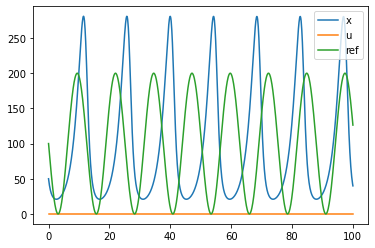

In [174]:
plt.plot(results['time'],results['x'], label='x')
plt.plot(results['time'],results['u'],label='u')
plt.plot(results['time'],referenceTraj,label='ref')
plt.legend()

In [169]:
time_control

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [ ]:
# Create reference trajectory
referenceTraj = np.sin(

In [ ]:
params = (filename, start_time, stop_time, output_interval, start_values, referenceTraj)

In [ ]:


result = _objective(u,*params): 

In [ ]:
scipy.optimize.least_squares

In [175]:
from scipy.interpolate import interp1d

In [ ]:
interp1d